<a href="https://colab.research.google.com/github/1rubenito/data_science/blob/main/Dados_de_hospedagem_em_Floren%C3%A7a_It%C3%A1lia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb | *Florença - Itália*

A cidade de *Florença* na **Itália** é conhecida por diversos pontos turísticos importantes no país. Em uma viagem pela Toscana a cidade de *Florença* é essencial pelos museus, passeios a pé e locais únicos. 

Alguns distritos da cidade são pontos importantes como o de *Gavinana e Galluzzo*, mais ao sudeste da cidade, rico em áreas verdes em torno de aldeias, famoso por ser um local procurado pelo belíssimo passeio a pé por vilas muito bonitas e por ter muitos assentamentos religiosos antigos. O *Distrito 3*, como também é conhecido, também hospedou os últimos anos de vida de `Galileo Galilei`.

O Centro Histórico de *Florença* é a atração principal da cidade, onde os melhores pontos turísticos estão localizados. Ao contrário de *Gavinana e Galluzzo*, o Centro Histórico é uma região de alta demanda, muita gente e pequena, o que facilita o acesso a quase tudo, visto que a cidade toda pode ser percorrida a pé em 30 minutos, normalmente. Também famosa pelos museus famosos que contém obras importantes de `Leonardo da Vinci`, `Raffaello`, `Michelangelo` e outros.




**Neste *notebook*, iremos analisar os dados referentes à cidade de  *Florença*, e ver quais insights podem ser extraídos a partir de dados brutos.**

*fonte:* https://bit.ly/2YtwGq8 |||
         https://bit.ly/3t6Nfq2 |||
         https://bit.ly/3r64ENI 
         
<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>
         

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv("http://data.insideairbnb.com/italy/toscana/florence/2020-12-21/visualisations/listings.csv")

#**Exemplo das 5 primeiras hospedagens**


In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,24469,Fortezza/City Centre Modern Apt 2+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78210,11.24392,Entire home/apt,70,2,1,2019-09-27,0.07,4,0
1,24470,Fortezza/City Centre Modern Apt 2+1,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78202,11.24399,Entire home/apt,70,2,3,2019-04-21,0.02,4,365
2,24471,Fortezza/City Centre Modern Apt 4+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78202,11.24399,Entire home/apt,135,2,0,NaN,NaN,4,365
3,24472,Fortezza/City Centre Modern Apt 4+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78202,11.24399,Entire home/apt,120,2,2,2012-04-11,0.02,4,1
4,31840,A Residenza Martin Classic room,380378,Officina 360,NaN,Centro Storico,43.77709,11.25216,Private room,35,1,119,2020-10-09,0.93,27,111


#**Identificando o tamanho dos dados e tipos**

In [6]:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

display(df.dtypes)

Entradas:	 11632
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# **Porcentagem de valores ausentes no dataset**

In [11]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.196613
last_review                       0.196613
host_name                         0.001290
name                              0.000172
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

# **Plotando por tipo de variável** 

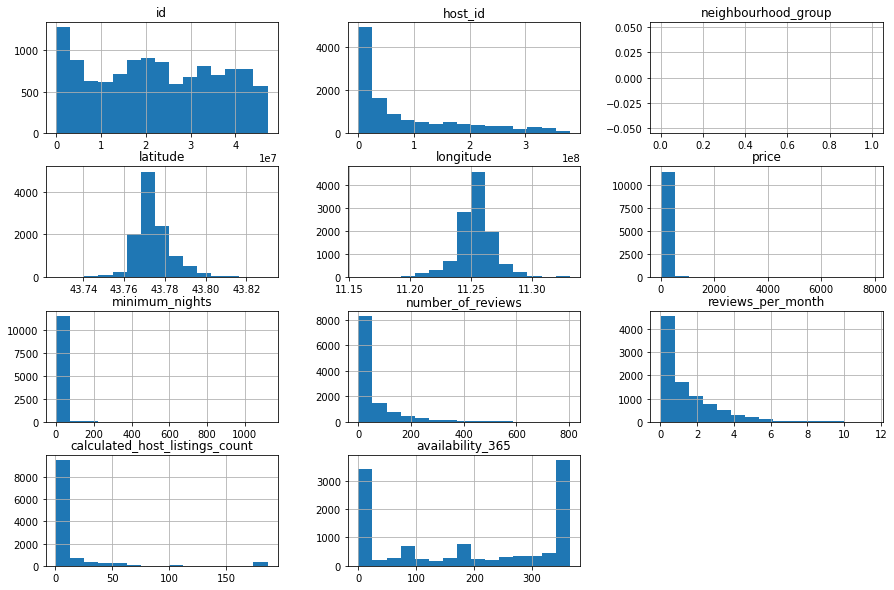

In [13]:
df.hist(bins=15, figsize=(15,10));

# **Média do preço da hospedagem(plot + média)**

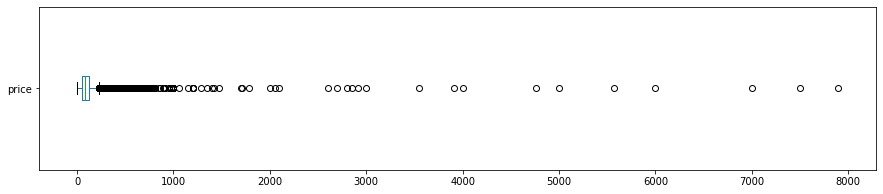


Média dos valores de hospedagem em Florença
11632 hospedagens
Valor médio: 112.766 $


In [40]:
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

print("\nMédia dos valores de hospedagem em Florença")
print("{} hospedagens".format(len(df['price'])))
print("Valor médio: {:.3f} $".format(df['price'].mean()))



# **Correlação existente entre as variáveis(plot + heatmap)**

In [28]:
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.176053,-0.086224,-0.092284,0.068233,0.025235
minimum_nights,0.176053,1.000000,-0.020525,-0.028621,-0.015212,0.006574
number_of_reviews,-0.086224,-0.020525,1.000000,0.848513,-0.109037,0.029494
reviews_per_month,-0.092284,-0.028621,0.848513,1.000000,-0.128354,0.008348
calculated_host_listings_count,0.068233,-0.015212,-0.109037,-0.128354,1.000000,-0.064617
availability_365,0.025235,0.006574,0.029494,0.008348,-0.064617,1.000000


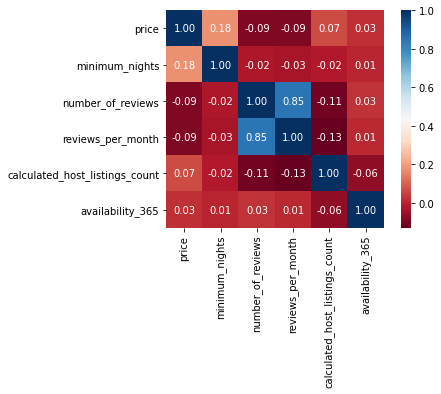

In [29]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

# **Tipo de imóvel(quantidade e %) e qual é o imóvel mais alugado em Florença**

In [31]:
df.room_type.value_counts()

Entire home/apt    8851
Private room       2493
Hotel room          250
Shared room          38
Name: room_type, dtype: int64

In [32]:
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.760918
Private room       0.214323
Hotel room         0.021492
Shared room        0.003267
Name: room_type, dtype: float64

# **Localidade mais cara em Florença(valor da hospedagem e plot lat/long)**



In [33]:
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Gavinana Galluzzo    160.441304
Centro Storico       119.060274
Campo di Marte        88.842506
Rifredi               82.298371
Isolotto Legnaia      80.521657
Name: price, dtype: float64

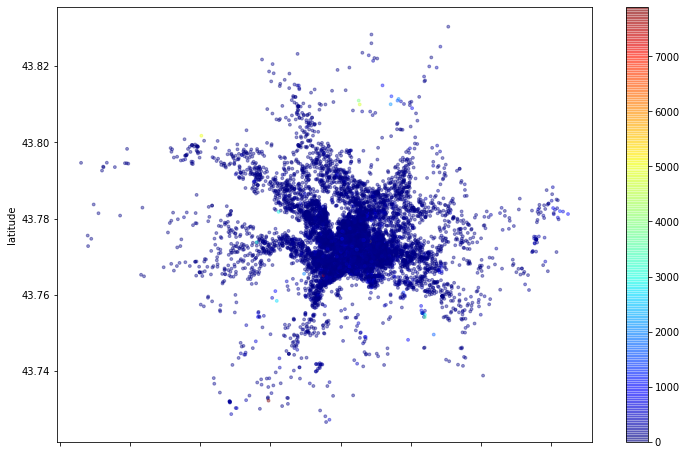

In [34]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c =df['price'], s=8,
        cmap=plt.get_cmap('jet'), figsize=(12,8));

# **Média do mínimo de noites para hospedagem**

In [39]:
print("\nMédia do mínimo de noites de hospedagem em Florença")
print("Média: {:.1f} dias".format(df['minimum_nights'].mean()))


Média do mínimo de noites de hospedagem em Florença
Média: 3.6 dias


## Conclusões


Com base em dados superficiais localizados em [Airbnb](http://insideairbnb.com/get-the-data.html) podemos concluir algumas informações relevantes sobre hospedagens em *Florença* na **Itália**.

## `Imóveis disponíveis`  

1. *Entire home/apt* - onde o imóvel fica totalmente disponível ao cliente, com **8851** localidades, cerca de 76,09% do total disponível. 
2. *Private room*  - onde apenas um quarto(de qualquer tipo), fica disponível ao cliente, com **2493** quartos, cerca de 21,43% do total disponível.
3. *Hotel Room* - quartos tradicionais de hotéis, com **250** quartos, cerca de 2,14% do total disponível.
4. *Shared room* - quartos compartilhados, com **38** quartos,cerca de 0,32% do total disponível.

## `Média de noites em Florença`
Em média, quem se hospeda em *Florença* pelo Airbnb, fica 3.6 noites na cidade.

## `Média de preço de hospedagem em Florença`
Em média, quem se hospeda em *Florença* pelo Airbnb, gasta **112.76** em hospedagem na cidade.

## `Preço por localidade`
A região mais cara de *Florença* é a de **Gavinana Galluzzo** com média de preço de **160.44**. Logo em seguida o *Centro Storico* com **119.06**, seguido de *Campo di Marte* com **88.84**, *Rifredi* com **82.29** e *Isolotto Legnaia* com **80.52**.

